In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [104]:
details=pd.read_csv("survey.csv")

In [105]:
#Dataframe 
df=pd.DataFrame(details)
df.head(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [106]:
#Determine data type and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [107]:
df.describe(include='all')

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1.259000e+03,1259,1259,744,1241,1259,1259,995,1259,...,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,1246,NaN,49,48,45,2,2,2,4,6,...,5,3,3,3,3,3,3,3,2,160
top,2014-08-27 12:44:51,NaN,Male,United States,CA,No,No,Yes,Sometimes,6-25,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,NaN,615,751,138,1095,767,637,465,290,...,563,490,925,774,516,1008,557,576,1075,5
mean,NaN,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
#Data Cleaning for inappropriate values
# Outlier of age as 329 and inappropriate age. 
min_age=details["Age"].min()
max_age=details["Age"].max()
median_age=details["Age"].median()
mode_age=details["Age"].mode()

print(f"Min: {min_age}, \nMax: {max_age}, \nMode: {mode_age}, \nMedian: {median_age}")


Min: -1726, 
Max: 99999999999, 
Mode: 0    29
Name: Age, dtype: int64, 
Median: 31.0


In [109]:
#replacing negative and wrong values wih median age 
df.loc[df["Age"]>80,["Age"]]=median_age
df.loc[df["Age"]<18,["Age"]]=median_age

In [110]:
df["Age"].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49, 53, 61, 72], dtype=int64)

In [111]:
df["Gender"].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [112]:
#Cleaning Gender data to Male, Female and other categories of transgender/Genderqueer to Others
df["Gender"]=df["Gender"].replace(["M","m","Mal","Male","Make","Male-ish","maile","Man","Malr","Mail",'Cis Man',
       'ostensibly male','msle',"Mal","male",'Male-ish', "maile",'Male (CIS)','something kinda male?','Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ','cis male','ostensibly male','Cis Male','ostensibly male, unsure what that really means'],"Male")
df["Gender"]=df.Gender.replace(['Female', 'female', 'Trans-female', 'Cis Female', 'F',
       'Woman', 'f', 'Femake', 'woman','Female ', 'Androgyne', 'Agender',
       'cis-female/femme','Female (cis)','femail'],"Female")
df["Gender"]=df.Gender.replace(['queer/she/they', 'non-binary',
       'Nah', 'All', 'Enby', 'fluid', 'Genderqueer', 'Trans woman',
       'Neuter', 'Female (trans)', 'queer', 'A little about you', 'p',
       ],"Others")

In [113]:
df["Gender"].unique()

array(['Female', 'Male', 'Others'], dtype=object)

In [114]:
#sum of missing values count
pd.isna(df).sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [115]:
#work_interfere and self_employed has missing values. Calculating % of missing values

missing_work_val=round((df.work_interfere.isna().sum()/len(df.work_interfere))*100,2)
missing_self_emp=round((df.self_employed.isna().sum()/len(df.self_employed))*100,2)
missing_work_val
# missing_self_emp

20.97

In [116]:
#As almost 80% of value is available, filling the NA values with Mode of each
df["self_employed"]=df["self_employed"].fillna(df["self_employed"].mode()[0])
df["work_interfere"] = df["work_interfere"].fillna(df["work_interfere"].mode()[0])


In [117]:
#State and comments column still has missing values. But it does not add much insights to our analysis.So dropping both the columns
df.drop(columns=["state","comments"])

,Timestamp,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27 11:29:31,37,Female,United States,No,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27 11:29:37,44,Male,United States,No,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2014-08-27 11:29:44,32,Male,Canada,No,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27 11:29:46,31,Male,United Kingdom,No,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27 11:30:22,31,Male,United States,No,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,Male,United Kingdom,No,No,Yes,Sometimes,26-100,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,2015-09-26 01:07:35,32,Male,United States,No,Yes,Yes,Often,26-100,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,2015-11-07 12:36:58,34,Male,United States,No,Yes,Yes,Sometimes,More than 1000,No,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,2015-11-30 21:25:06,46,Female,United States,No,No,No,Sometimes,100-500,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


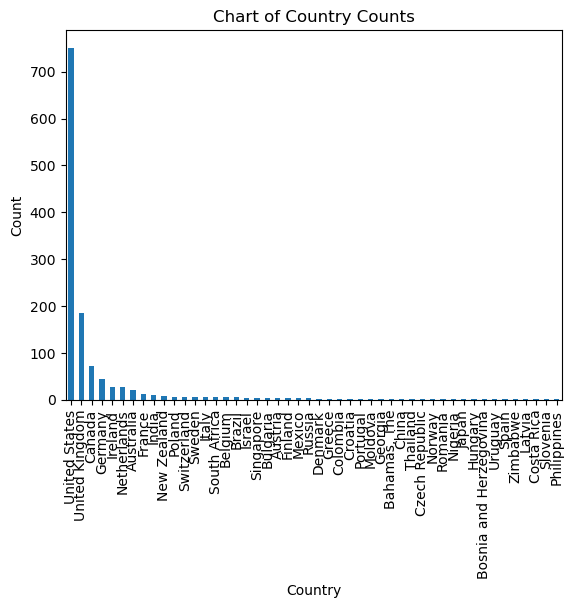

In [118]:
#After the data is cleaned, lets start our analysis by starting with country level 
cnt=df['Country'].value_counts()
ax=cnt.plot(kind="bar")
x=ax.set_xlabel("Country")
y=ax.set_ylabel("Count")
plt.title('Chart of Country Counts')
plt.show()

In [119]:
# We see the countries with high mental health reporting are
# United States
# United Kingdom
# Canada

In [120]:
# Now we need to analyse the reason for it. THe factors may be age, family history, physical health consequence,self employed

In [121]:
# #Lets analyse about the age
df["Age"].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49, 53, 61, 72], dtype=int64)

<Axes: >

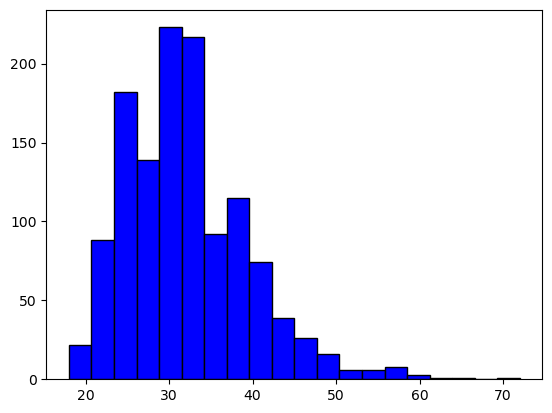

In [122]:
df.Age.hist(grid=False,color="Blue",edgecolor="Black",bins=20)

<Axes: >

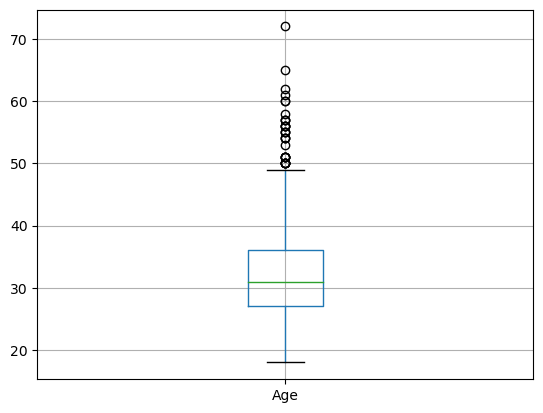

In [123]:
#Lets plot boxplot to determine the outliers and max age group people
df.boxplot(column=['Age'])

#As per the graph, people between age 28 to 36 are most affected

In [124]:
df.no_employees.unique()

array(['6-25', 'More than 1000', '26-100', '100-500', '1-5', '500-1000'],
      dtype=object)

In [125]:
df.no_employees.value_counts()

6-25              290
26-100            289
More than 1000    282
100-500           176
1-5               162
500-1000           60
Name: no_employees, dtype: int64

[Text(0, 0, '290'),
 Text(0, 0, '289'),
 Text(0, 0, '282'),
 Text(0, 0, '176'),
 Text(0, 0, '162'),
 Text(0, 0, '60')]

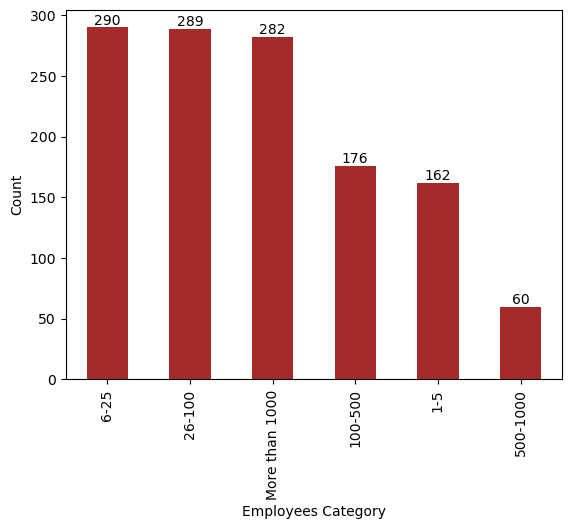

In [126]:
val=df.no_employees.value_counts()
ax=val.plot(kind="bar",color="Brown")
x=ax.set_xlabel("Employees Category")
y=ax.set_ylabel("Count")
ax.bar_label(ax.containers[0], label_type='edge')

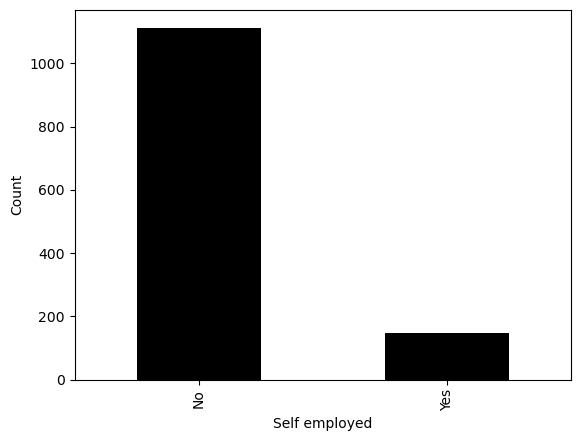

In [127]:
#Finding the count of employees who are self employed or not
self=df.self_employed.value_counts()
ax=self.plot(kind="bar",color="black")
x=ax.set_xlabel("Self employed")
y=ax.set_ylabel("Count")


[Text(0, 0, '767'), Text(0, 0, '492')]

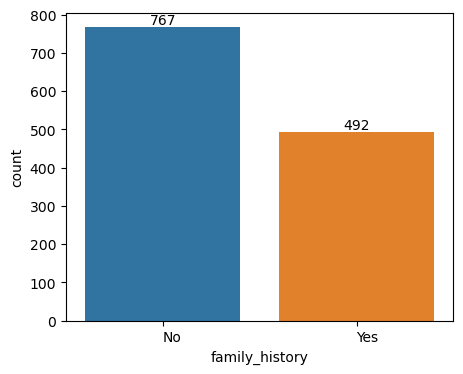

In [128]:
#Stacked bar chart for people with family history and those requires treatment
plt.figure(figsize=(5,4))
ax = sns.countplot(x='family_history', data=df)
ax.set_xticklabels(ax.get_xticklabels(),
                   horizontalalignment='left')
ax.bar_label(ax.containers[0], label_type='edge')

[Text(0, 0, '637'), Text(0, 0, '622')]

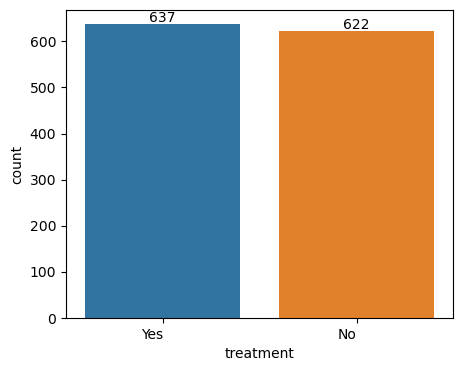

In [129]:
plt.figure(figsize=(5,4))
ax = sns.countplot(x='treatment', data=df)
ax.set_xticklabels(ax.get_xticklabels(),
                   horizontalalignment='right')
ax.bar_label(ax.containers[0], label_type='edge')

C:\Users\sathy\AppData\Local\Temp\ipykernel_31572\418977074.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  bx.set_xticklabels(bx.get_xticklabels(),horizontalalignment='left')


[Text(0, 0, '883'), Text(0, 0, '376')]

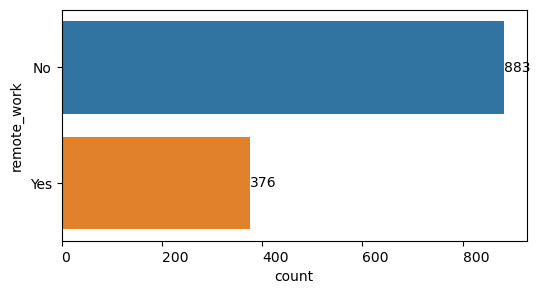

In [73]:
plt.figure(figsize=(6,3))
bx=sns.countplot(y='remote_work',data=df)
bx.set_xticklabels(bx.get_xticklabels(),horizontalalignment='left')
bx.bar_label(bx.containers[0],label_type='edge')

In [46]:
ts=df.Timestamp
ts

0       2014-08-27 11:29:31
1       2014-08-27 11:29:37
2       2014-08-27 11:29:44
3       2014-08-27 11:29:46
4       2014-08-27 11:30:22
               ...         
1254    2015-09-12 11:17:21
1255    2015-09-26 01:07:35
1256    2015-11-07 12:36:58
1257    2015-11-30 21:25:06
1258    2016-02-01 23:04:31
Name: Timestamp, Length: 1259, dtype: object

In [144]:
# Determine Year wise count of people reported
df['year'] = pd.DatetimeIndex(df['Timestamp']).year
df['year'].unique()

array([2014, 2015, 2016], dtype=int64)

[Text(0, 0, '1190'), Text(0, 0, '68'), Text(0, 0, '1')]

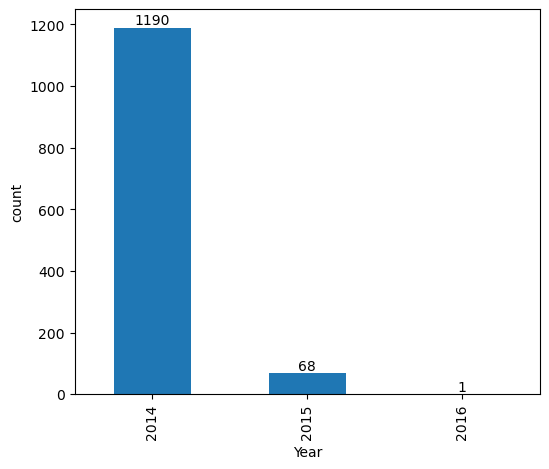

In [145]:
a=df['year'].value_counts()
bx=a.plot(kind='bar',xlabel='Year',ylabel='count',figsize=(6,5))
bx.bar_label(bx.containers[0],label_type='edge')

In [146]:
# USA, UK and Canada accounts for the most cases
# Mental Health issues affect more of individuals who are
    # Employees
    # Aged between 28-36
    # Who are not self emaployed,working in the office, and not remote and do not have family history

In [147]:
print(f'self_employed rate:{df.self_employed.unique()}\n',
      f'family_history rate:{df.family_history.unique()}\n',
      f'treatment rate:{df.treatment.unique()}\n',
      f'mental_health_consequence rate:{df.mental_health_consequence.unique()}\n',
      f'phys_health_consequence rate:{df.phys_health_consequence.unique()}\n',
      f'obs_consequence rate:{df.obs_consequence.unique()}\n'
     )
# ,family_history,treatment,mental_health_consequence,phys_health_consequence

self_employed rate:['No' 'Yes']
 family_history rate:['No' 'Yes']
 treatment rate:['Yes' 'No']
 mental_health_consequence rate:['No' 'Maybe' 'Yes']
 phys_health_consequence rate:['No' 'Yes' 'Maybe']
 obs_consequence rate:['No' 'Yes']



In [131]:
df1=pd.DataFrame()
df["self_employed_num"] = df["self_employed"].map({"No": 0, "Yes": 1})
df["family_history_num"] = df["family_history"].map({"No": 0, "Yes": 1})
df["treatment_num"] = df["treatment"].map({"No": 0, "Yes": 1})
df["remote_work_num"] = df["remote_work"].map({"No": 0, "Yes": 1})
df["mental_health_consequence_num"] = df["mental_health_consequence"].map({"No": 0, "Yes": 1, "Maybe": 2})
df["phys_health_consequence_num"] = df["phys_health_consequence"].map({"No": 0, "Yes": 1, "Maybe": 2})
df["obs_consequence_num"] = df["obs_consequence"].map({"No": 0, "Yes": 1})

In [148]:
df1["self_employed_num"] = df["self_employed_num"]
df1["year"] = df["year"]
df1["family_history_num"] = df["family_history_num"]
df1["treatment_num"] = df["treatment_num"]
df1["remote_work_num"] = df["remote_work_num"]
df1["mental_health_consequence_num"] = df["mental_health_consequence_num"]
df1["phys_health_consequence_num"] = df["phys_health_consequence_num"]
df1["obs_consequence_num"] = df["obs_consequence_num"]

In [149]:
df1

,self_employed_num,family_history_num,treatment_num,remote_work_num,mental_health_consequence_num,phys_health_consequence_num,obs_consequence_num,year
0,0,0,1,0,0,0,0,2014
1,0,0,0,0,2,0,0,2014
2,0,0,0,0,0,0,0,2014
3,0,1,1,0,1,1,1,2014
4,0,0,0,1,0,0,0,2014
...,...,...,...,...,...,...,...,...
1254,0,0,1,0,0,0,0,2015
1255,0,1,1,1,0,0,0,2015
1256,0,1,1,0,1,1,0,2015
1257,0,0,0,1,1,0,0,2015


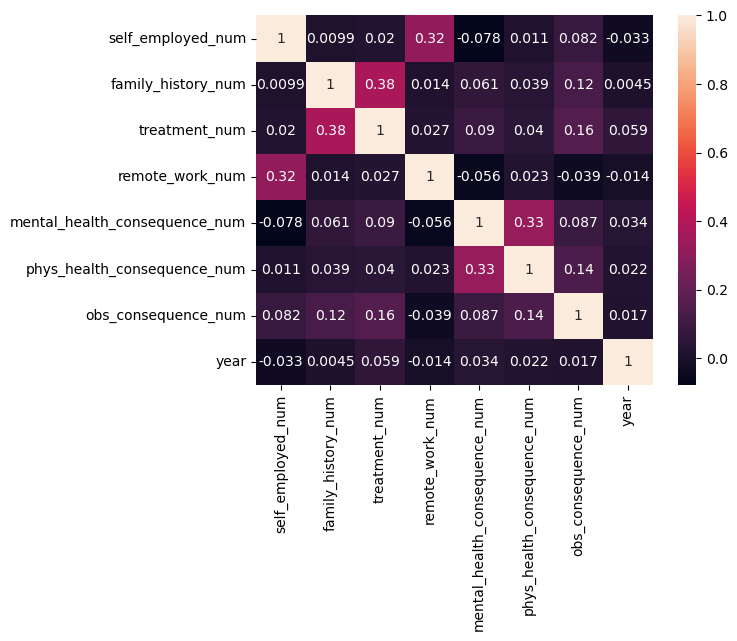

<Axes: >

In [151]:
ax=sns.heatmap(df1.corr(),annot=True)
plt.show()
ax